# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID='+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="+ city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except :
        
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | chefchaouene
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | warmbad
Processing Record 8 of Set 1 | dalcahue
Processing Record 9 of Set 1 | coronel oviedo
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | port augusta
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | eforie sud
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | lebu
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.59,63,7,8.04,NZ,1738029123
1,anadyr,64.7500,177.4833,-33.72,73,79,5.00,RU,1738029081
2,chefchaouene,35.1688,-5.2636,10.89,98,77,2.74,MA,1738029125
3,port-aux-francais,-49.3500,70.2167,5.49,82,71,17.69,TF,1738029126
4,port elizabeth,-33.9180,25.5701,19.62,99,100,2.68,ZA,1738029127


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.59,63,7,8.04,NZ,1738029123
1,anadyr,64.7500,177.4833,-33.72,73,79,5.00,RU,1738029081
2,chefchaouene,35.1688,-5.2636,10.89,98,77,2.74,MA,1738029125
3,port-aux-francais,-49.3500,70.2167,5.49,82,71,17.69,TF,1738029126
4,port elizabeth,-33.9180,25.5701,19.62,99,100,2.68,ZA,1738029127


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

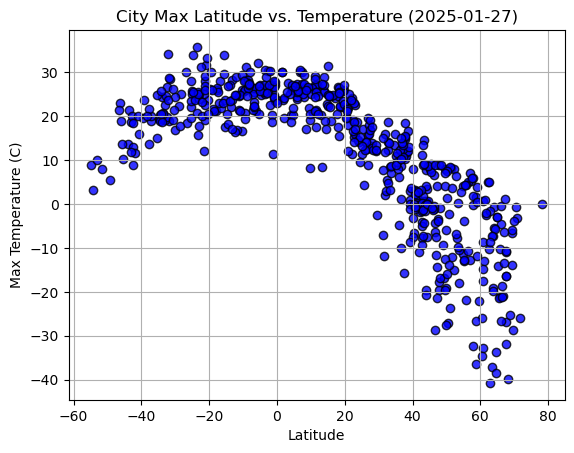

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolor='blue', edgecolors='black', linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

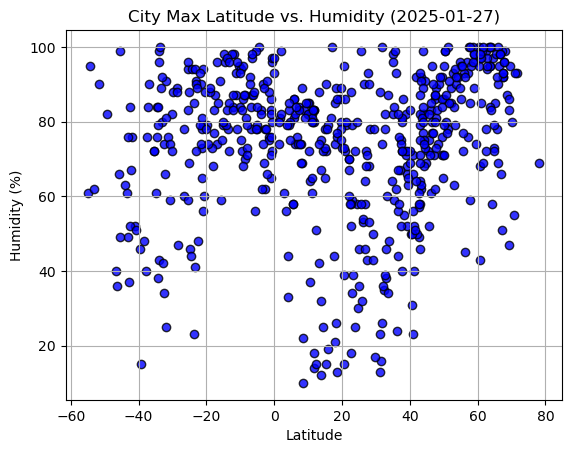

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolor='blue', edgecolors='black', linewidths=1, alpha=0.8)


# Save the figure
plt.savefig("Fig1.png")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

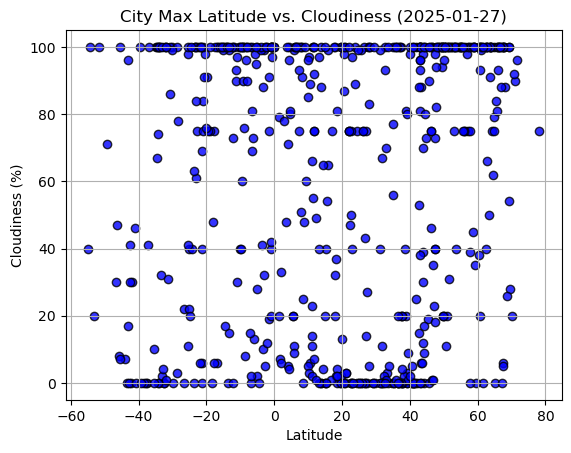

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', facecolor='blue', edgecolors='black', linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

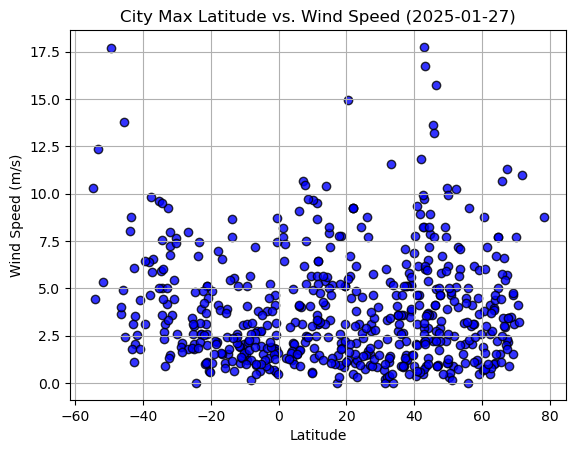

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', facecolor='blue', edgecolors='black', linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def line_function(x_value, y_value):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    return regress_values, line_eq


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,anadyr,64.7500,177.4833,-33.72,73,79,5.00,RU,1738029081
2,chefchaouene,35.1688,-5.2636,10.89,98,77,2.74,MA,1738029125
9,albany,42.6001,-73.9662,0.35,49,53,0.45,US,1738028866
10,bethel,41.3712,-73.4140,1.48,40,0,4.63,US,1738029134
14,hilo,19.7297,-155.0900,25.85,80,100,5.14,US,1738029138


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.59,63,7,8.04,NZ,1738029123
3,port-aux-francais,-49.3500,70.2167,5.49,82,71,17.69,TF,1738029126
4,port elizabeth,-33.9180,25.5701,19.62,99,100,2.68,ZA,1738029127
5,avarua,-21.2078,-159.7750,28.03,78,40,5.14,CK,1738029128
6,warmbad,-28.4500,18.7333,24.94,47,78,2.13,NaN,1738029129


###  Temperature vs. Latitude Linear Regression Plot

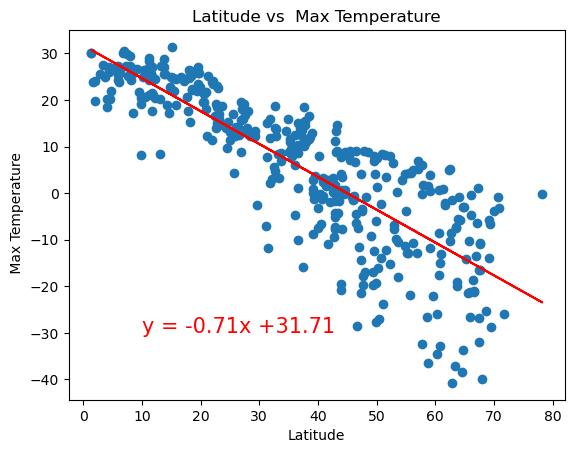

In [20]:

 # Create Plot
line, annotation = line_function(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(' Max Temperature')
plt.annotate(annotation,(10,-30),fontsize=15,color="red")
plt.title("Latitude vs  Max Temperature")
plt.show()

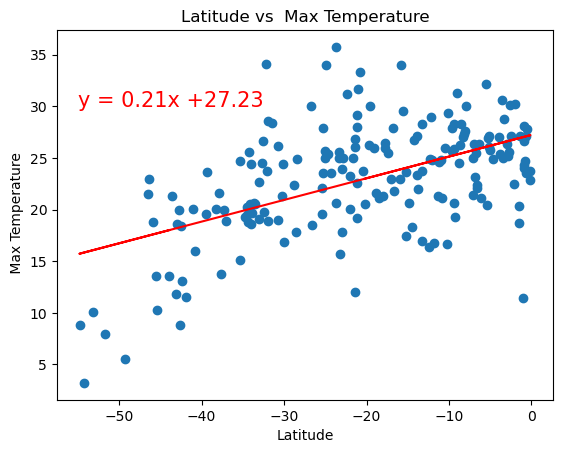

In [21]:

line, annotation = line_function(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
 # Create Plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(' Max Temperature')
plt.annotate(annotation,(-55,30),fontsize=15,color="red")
plt.title("Latitude vs  Max Temperature")
plt.show()


**Discussion about the linear relationship:** In the Northern Hemisphere we see that as the latitude increases the temperature drops. Compared to the Southern Hemisphere where we see as the latitude increases towards the equator we see the temperature increase. We do see that in the Northern Hemisphere the slope is stronger, which shows us that the temperature change with the latitude is more evident in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

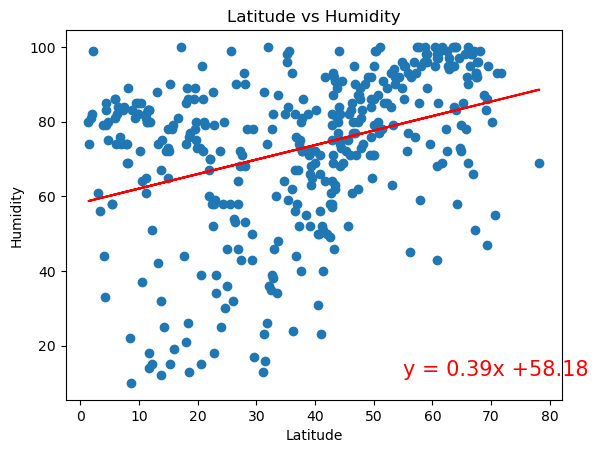

In [24]:
# Northern Hemisphere
line, annotation = line_function(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(annotation,(55,12),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.show()

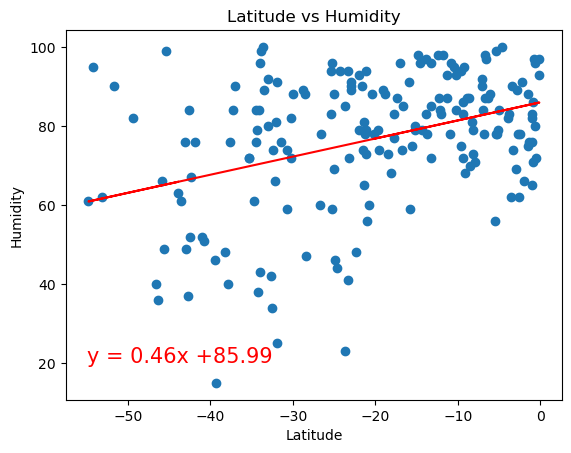

In [25]:
# Southern Hemisphere
line, annotation = line_function(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
 # Create Plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(annotation,(-55,20),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** We see here that the Southern Hemisphere has a slightly stronger correlation as compared to the Northern Hemisphere. This tells us that the humidity increase is more noticeable with the increase in latitude in the Southern Hemisphere. We can also see that we have a wide scatter of data points in each plot. This implies that there are other factors outside of just latitude that can cause a change in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

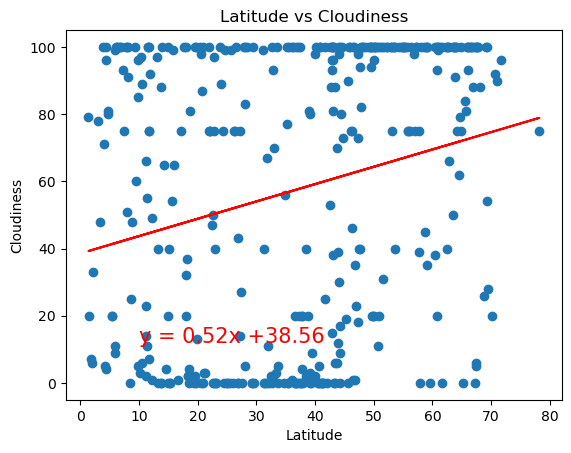

In [26]:
# Northern Hemisphere
line, annotation = line_function(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(annotation,(10,12),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.show()

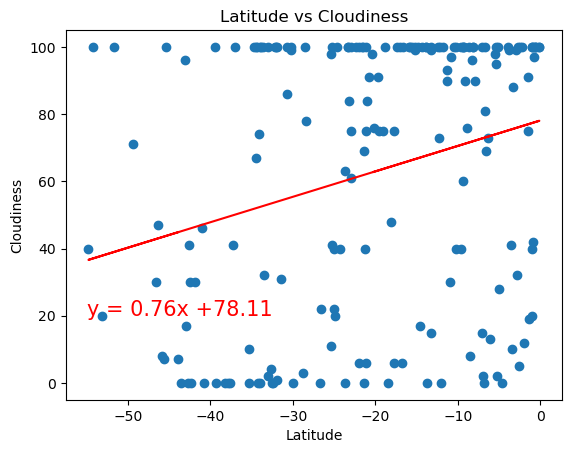

In [27]:
# Southern Hemisphere
line, annotation = line_function(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
 # Create Plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(annotation,(-55,20),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** In both plots we can see that our scatters are showing that the clouds are often either clear skies or fully overcast, rather than getting them evenly distributed. We can also see that the higher that latitudes tend to have more cloud cover in both Hemispheres. With the high variability in both data sets we can also imply that latitude alone is not enough to predict cloudiness. Other geographical factors most likely play a significant role. 

### Wind Speed vs. Latitude Linear Regression Plot

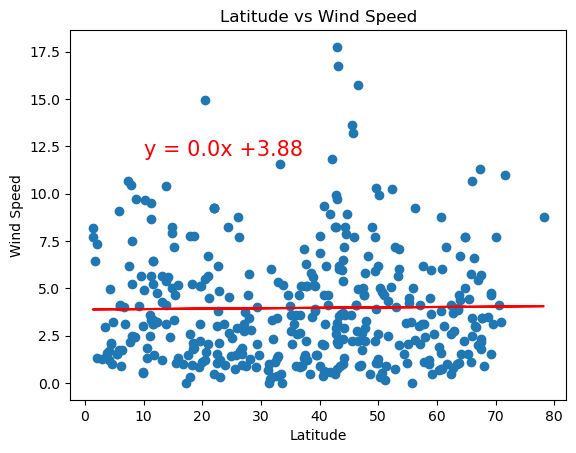

In [28]:
# Northern Hemisphere
line, annotation = line_function(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(annotation,(10,12),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.show()

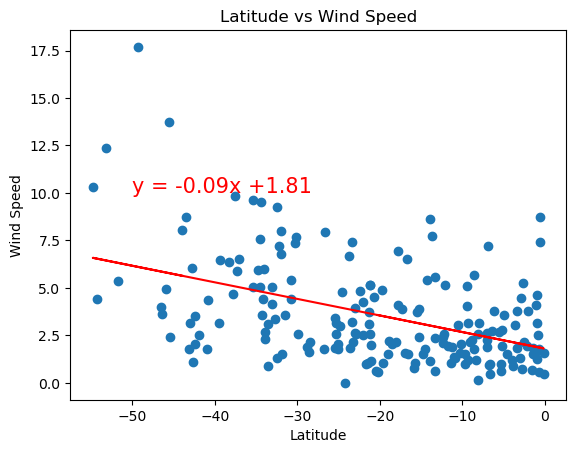

In [31]:
# Southern Hemisphere
line, annotation = line_function(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

 # Create Plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],line,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(annotation,(-50,10),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere we can see that there is no correlation between wind speed and latitude. For the Southern Hemisphere we see a negative relationship. It shows us a low slop and scatter points that indicated that latitude isn't a significant factor when it comes to wind speeds. Overall, between the two charts we can see that wind speed isn’t likely influenced significantly by latitude, and is more likely influenced by other geographical features. 